<center><h1><strong>Simple Linear Regression</strong></h1><center/>

In simple linear regression , you will have one feature column and one target column.

In [9]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [24]:
d = fetch_california_housing()
d.data


df = pd.DataFrame(d.data,columns=d.feature_names)

In [25]:
target_df = pd.DataFrame(d.target,columns=d.target_names)

In [19]:
target_df

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [26]:
df['target'] = target_df['MedHouseVal']

In [28]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Simple Linear regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [47]:
X = df[['MedInc']]
y = df['target']

First to train and test split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=42)

In [49]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)


Prediction

In [51]:
y_pred= model.predict(X_test)

In [57]:
x_test_sorted = X_test.sort_values(by='MedInc')
y_test_sorted = y_test.loc[x_test_sorted.index]
y_pred_sorted = model.predict(x_test_sorted)

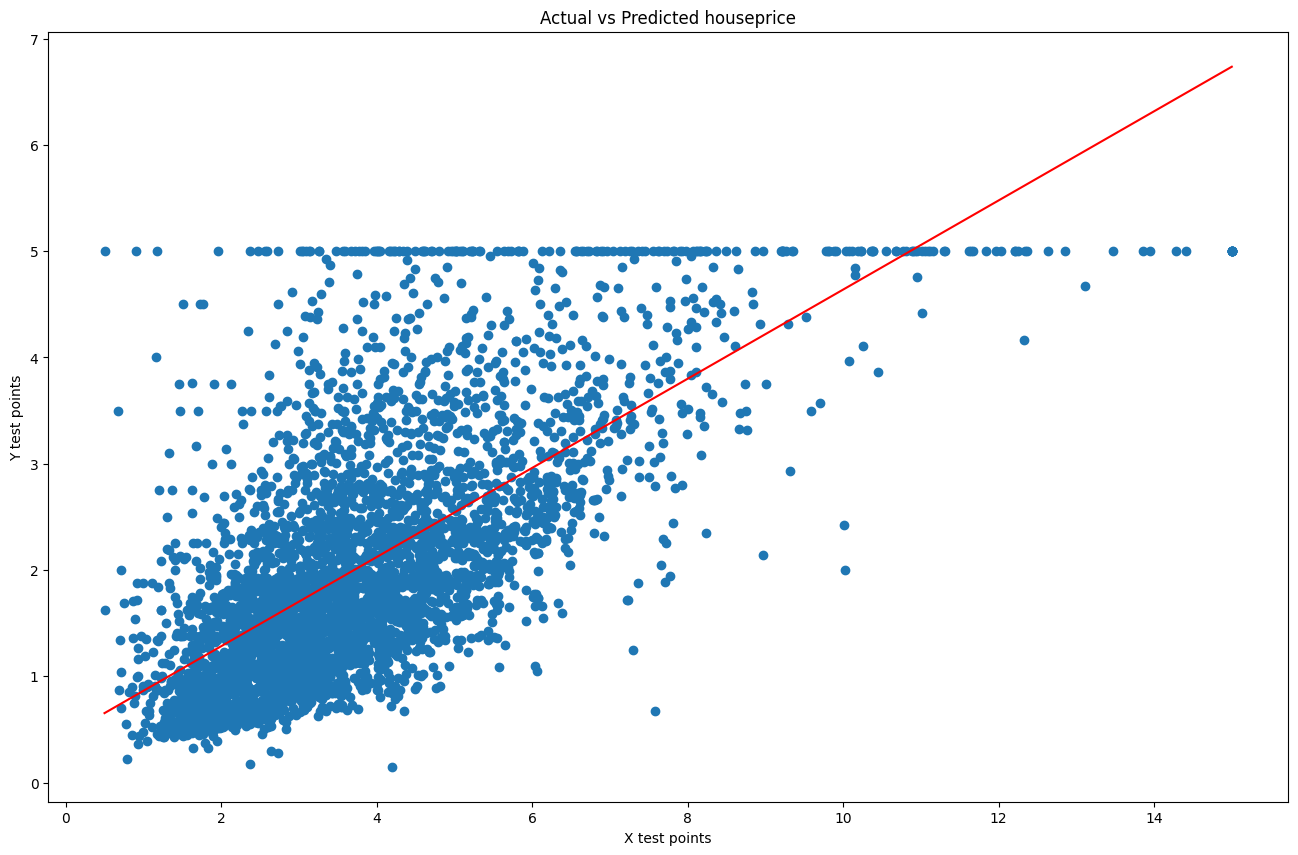

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,10))
#actual values
plt.scatter(x_test_sorted,y_test_sorted)
plt.plot(x_test_sorted,y_pred_sorted,color='red')
plt.xlabel("X test points")
plt.ylabel("Y test points")
plt.title("Actual vs Predicted houseprice")
plt.show()